# <span style="color:green"> Charges in Sequences </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import statistics as stat
import time
from Bio.Seq import Seq

In [2]:
import gpcr_package as gpcr


>>>>>>>>>>>>>>>>> Testing dependencies...
`gpcr_package` depends on the following packages:
['ProgressBar', 'Seq', 'SeqIO', 'ceil', 'clr', 'colored', 'cprint', 'datetime', 'display', 'floor', 'go', 'it', 'kurtosis', 'norm', 'np', 'os', 'pd', 'pickle', 'plt', 'skew', 'stat', 'style']
<<<<<<<<<<<<<<<<< Dependencies test successful!


>>>>>>>>>>>>>>>>> Testing constants...
`gpcr_package` uses the following constants:
['AA', 'AA_ABBREVATIONS', 'AA_ABBRE_LONG_NAMES', 'AA_ABBRE_SHORT_NAMES', 'AA_CHARGES_PH7', 'AA_HYDRO_PHOBICITY_PH2', 'AA_HYDRO_PHOBICITY_PH7', 'AA_LONG_NAMES', 'AA_SHORT_NAMES', 'BINS_PLOT_HIST', 'COLOR_AT', 'COLOR_COLORBAR_CMAP', 'COLOR_COLORBAR_CMAP_RED_BLUE', 'COLOR_CONFI_LINE', 'COLOR_FIT_GAUSSIAN', 'COLOR_GPCR_CLASSES', 'COLOR_GPCR_CLASSES_ALL', 'COLOR_LT', 'COLOR_MEAN_LINE', 'COLOR_MEDIAN_LINE', 'COLOR_PLOT_HIST_DEFAULT', 'COLOR_PLOT_LINE', 'COLOR_PLOT_SCATTER', 'COLOR_QUANTILE_LINE', 'COLOR_SEQ_COMPARISION_LENGTH_COMPARISION', 'COLOR_SEQ_COMPARISION_LENGTH_NON_COMPARI

In [3]:
set( gpcr.GPCR_DF["class"] )

{'A', 'AD', 'B', 'C', 'F'}

In [4]:
gpcr.GPCR_DF

,gene,class,name,seq_len,seq
0,DRD2,A,GPCR,12,EFRKAFLKILHC
1,P2RY13,A,GPCR,12,KKFTEKLPCMQG
2,F2RL2,A,GPCR,13,SKTRNHSTAYLTK
3,ADGRF2,AD,GPCR,13,DQVQSERIHEDVL
4,DRD3,A,GPCR,14,NIEFRKAFLKILSC
5,ADGRG3,AD,GPCR,15,SSTARLDQAHSASQE
6,HTR1F,A,GPCR,16,NEDFKKAFQKLVRCRC
7,HTR5A,A,GPCR,16,NKNYNSAFKNFFSRQH
8,DRD4,A,GPCR,16,NAEFRNVFRKALRACC
9,NPY5R,A,GPCR,17,NNGIKADLVSLIHCLHM


In [5]:
gpcr.GPCR_DF[ gpcr.GPCR_DF["class"] == "F" ]

,gene,class,name,seq_len,seq
29,FZD7,F,GPCR,25,SGKTLQSWRRFYHRLSHSSKGETAV
30,FZD2,F,GPCR,25,SGKTLHSWRKFYTRLTNSRHGETTV
31,FZD1,F,GPCR,25,SGKTLNSWRKFYTRLTNSKQGETTV
84,FZD4,F,GPCR,39,KTLHTWQKCSNRLVNSGKVKREKRGNGWVKPGKGSETVV
203,FZD10,F,GPCR,58,TSKTLQSWQQVCSRRLKKKSRRKPASVITSGGIYKKAQHPQKTHHG...
216,FZD9,F,GPCR,62,SSKTFQTWQSLCYRKIAAGRARAKACRAPGSYGRGTHCHYKAPTVV...
225,FZD5,F,GPCR,64,WSGKTVESWRRFTSRCCCRPRRGHKSGGAMAAGDYPEASAALTGRT...
293,FZD8,F,GPCR,89,SGKTLESWRSLCTRCCWASKGAAVGGGAGATAAGGGGGPGGGGGGG...
334,FZD3,F,GPCR,168,GSKKTCFEWASFFHGRRKKEIVNESRQVLQEPDFAQSLLRDPNTPI...
341,FZD6,F,GPCR,212,GSKKTCTEWAGFFKRNRKRDPISESRRVLQESCEFFLKHNSKVKHK...


In [6]:
gpcr.GPCR_DF[ gpcr.GPCR_DF["class"] == "C" ]

,gene,class,name,seq_len,seq
34,TAS1R1,C,GPCR,25,CRPDLNSTEHFQASIQDYTRRCGST
60,GRM6,C,GPCR,32,HPEQNVQKRKRSLKATSTVAAPPKGEDAEAHK
65,TAS1R2,C,GPCR,34,GYFGPKCYMILFYPERNTPAYFNSMIQGYTMRRD
99,TAS1R3,C,GPCR,42,LPRCYLLMRQPGLNTPEFFLGGGPGDAQGQNDGNTGNQGKHE
168,GRM3,C,GPCR,51,QPQKNVVTHRLHLNRFSVSGTGTTYSQSSASTYVPTVCNGREVLDS...
178,GRM2,C,GPCR,53,QPQKNVVSHRAPTSRFGSAAARASSSLGQGSGSQFVPTVCNGREVV...
235,GRM4,C,GPCR,65,HPEQNVPKRKRSLKAVVTAATMSNKFTQKGNFRPNGEAKSELCENL...
236,GRM7,C,GPCR,65,HPELNVQKRKRSFKAVVTAATMSSRLSHKPSDRPNGEAKTELCENV...
237,GRM8,C,GPCR,65,HPEQNVQKRKRSFKAVVTAATMQSKLIQKGNDRPNGEVKSELCESL...
283,GPRC5D,C,GPCR,85,ELCILYRSCRQECPLQGNACPVTAYQHSFQVENQELSRARDSDGAE...


# <span style="color:red"> Charges in GPCR </span>

In [7]:
gpcr.AA.CHARGES_PH7

{'R': 1,
 'K': 1,
 'H': 1,
 'D': -1,
 'E': -1,
 'N': 0,
 'Q': 0,
 'C': 0,
 'S': 0,
 'T': 0,
 'Y': 0,
 'G': 0,
 'A': 0,
 'P': 0,
 'V': 0,
 'L': 0,
 'I': 0,
 'M': 0,
 'W': 0,
 'F': 0}

100% |########################################################################|


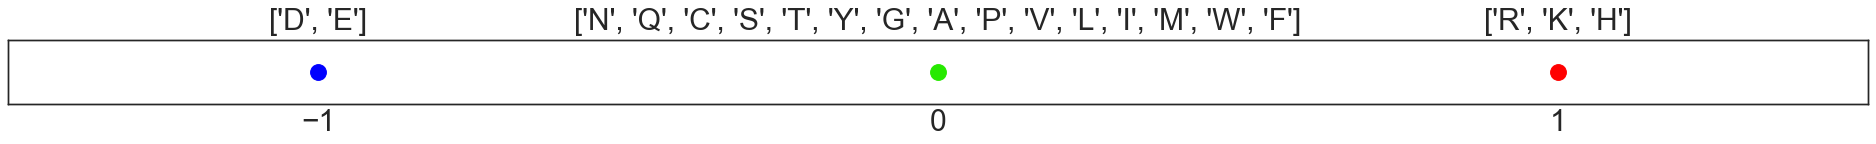

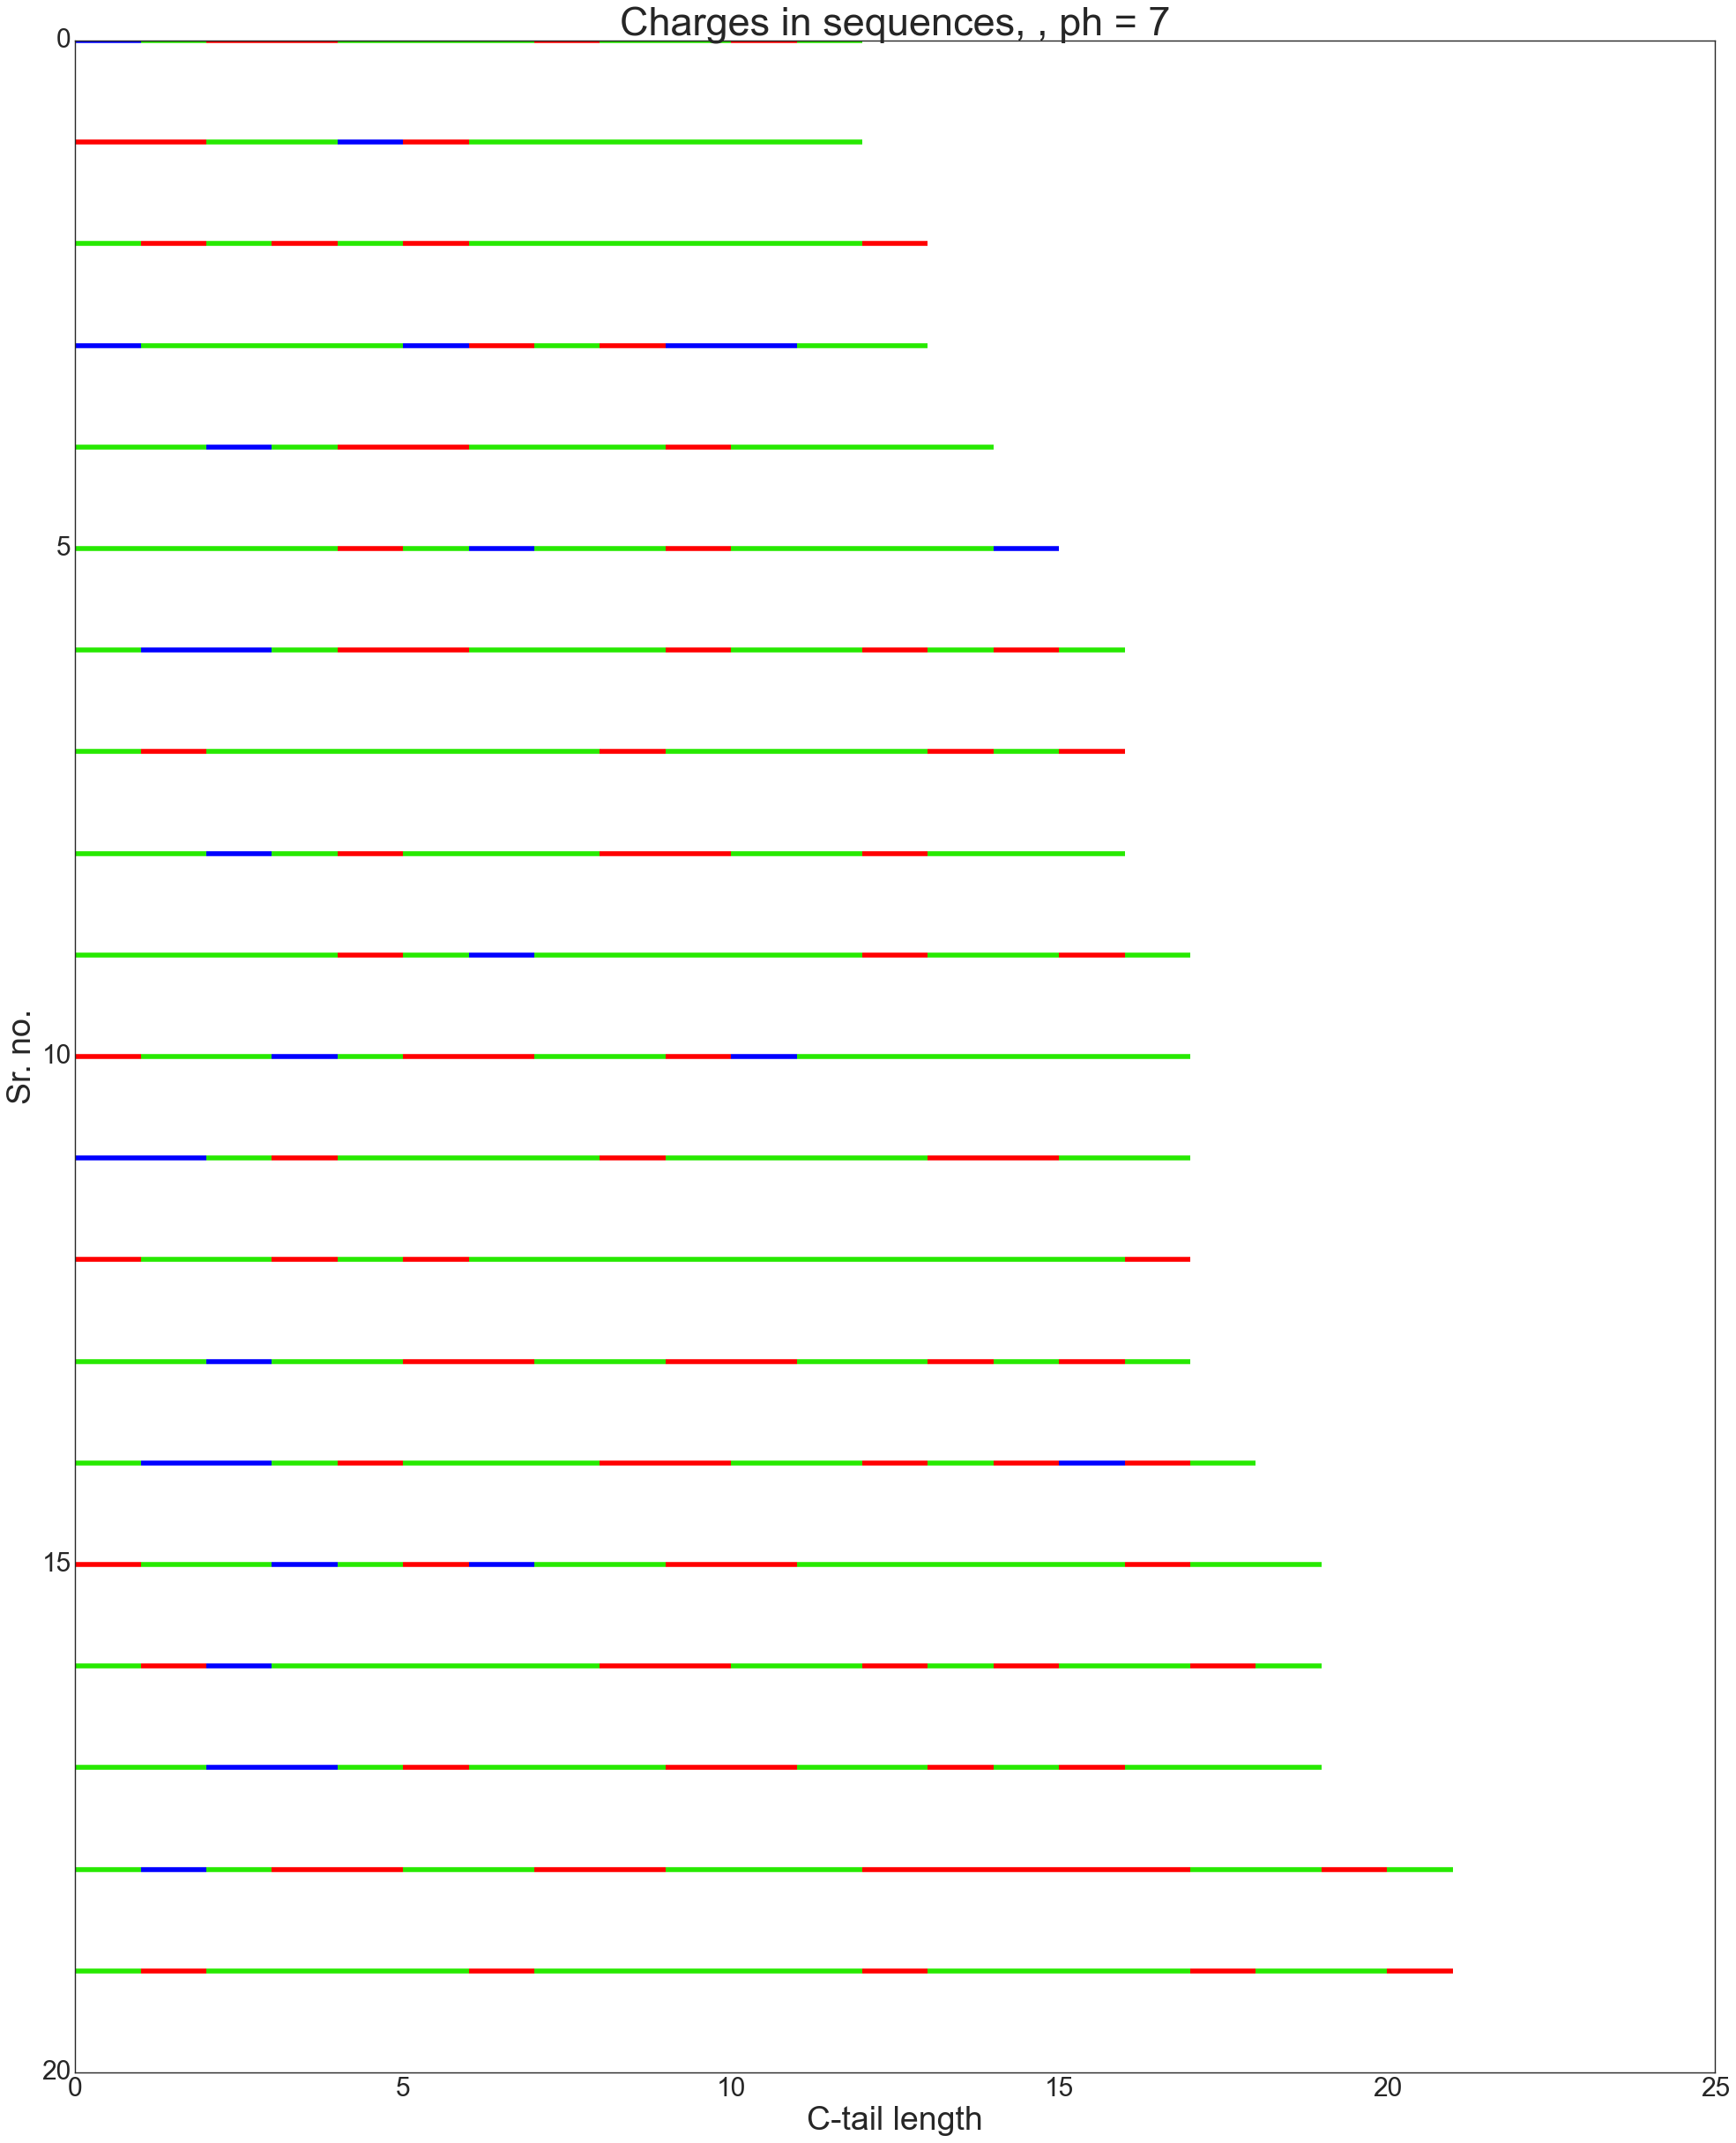

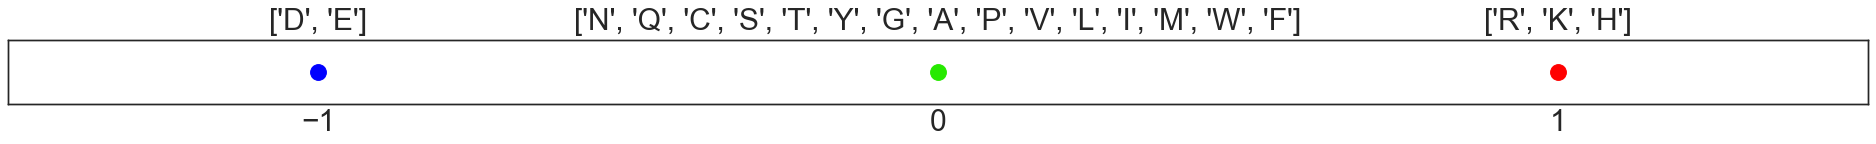

In [12]:
_ = gpcr.line_charges_in_sequences( sequences    = gpcr.GPCR_DF[0:20]["seq"],
                                           scale_factor = 0.45,
                                           figsize      = (30, 36),
                                           normalized   = False,
                                           savefig      = False,
                                           title_add    = ", ph = 7"
                                         ) 

# <span style="color:orange"> Charges in GPCR at ph = 7 </span>

### All tails

100% |########################################################################|


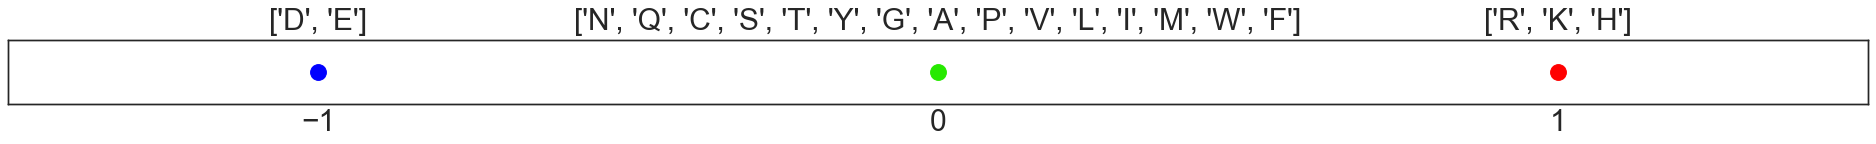

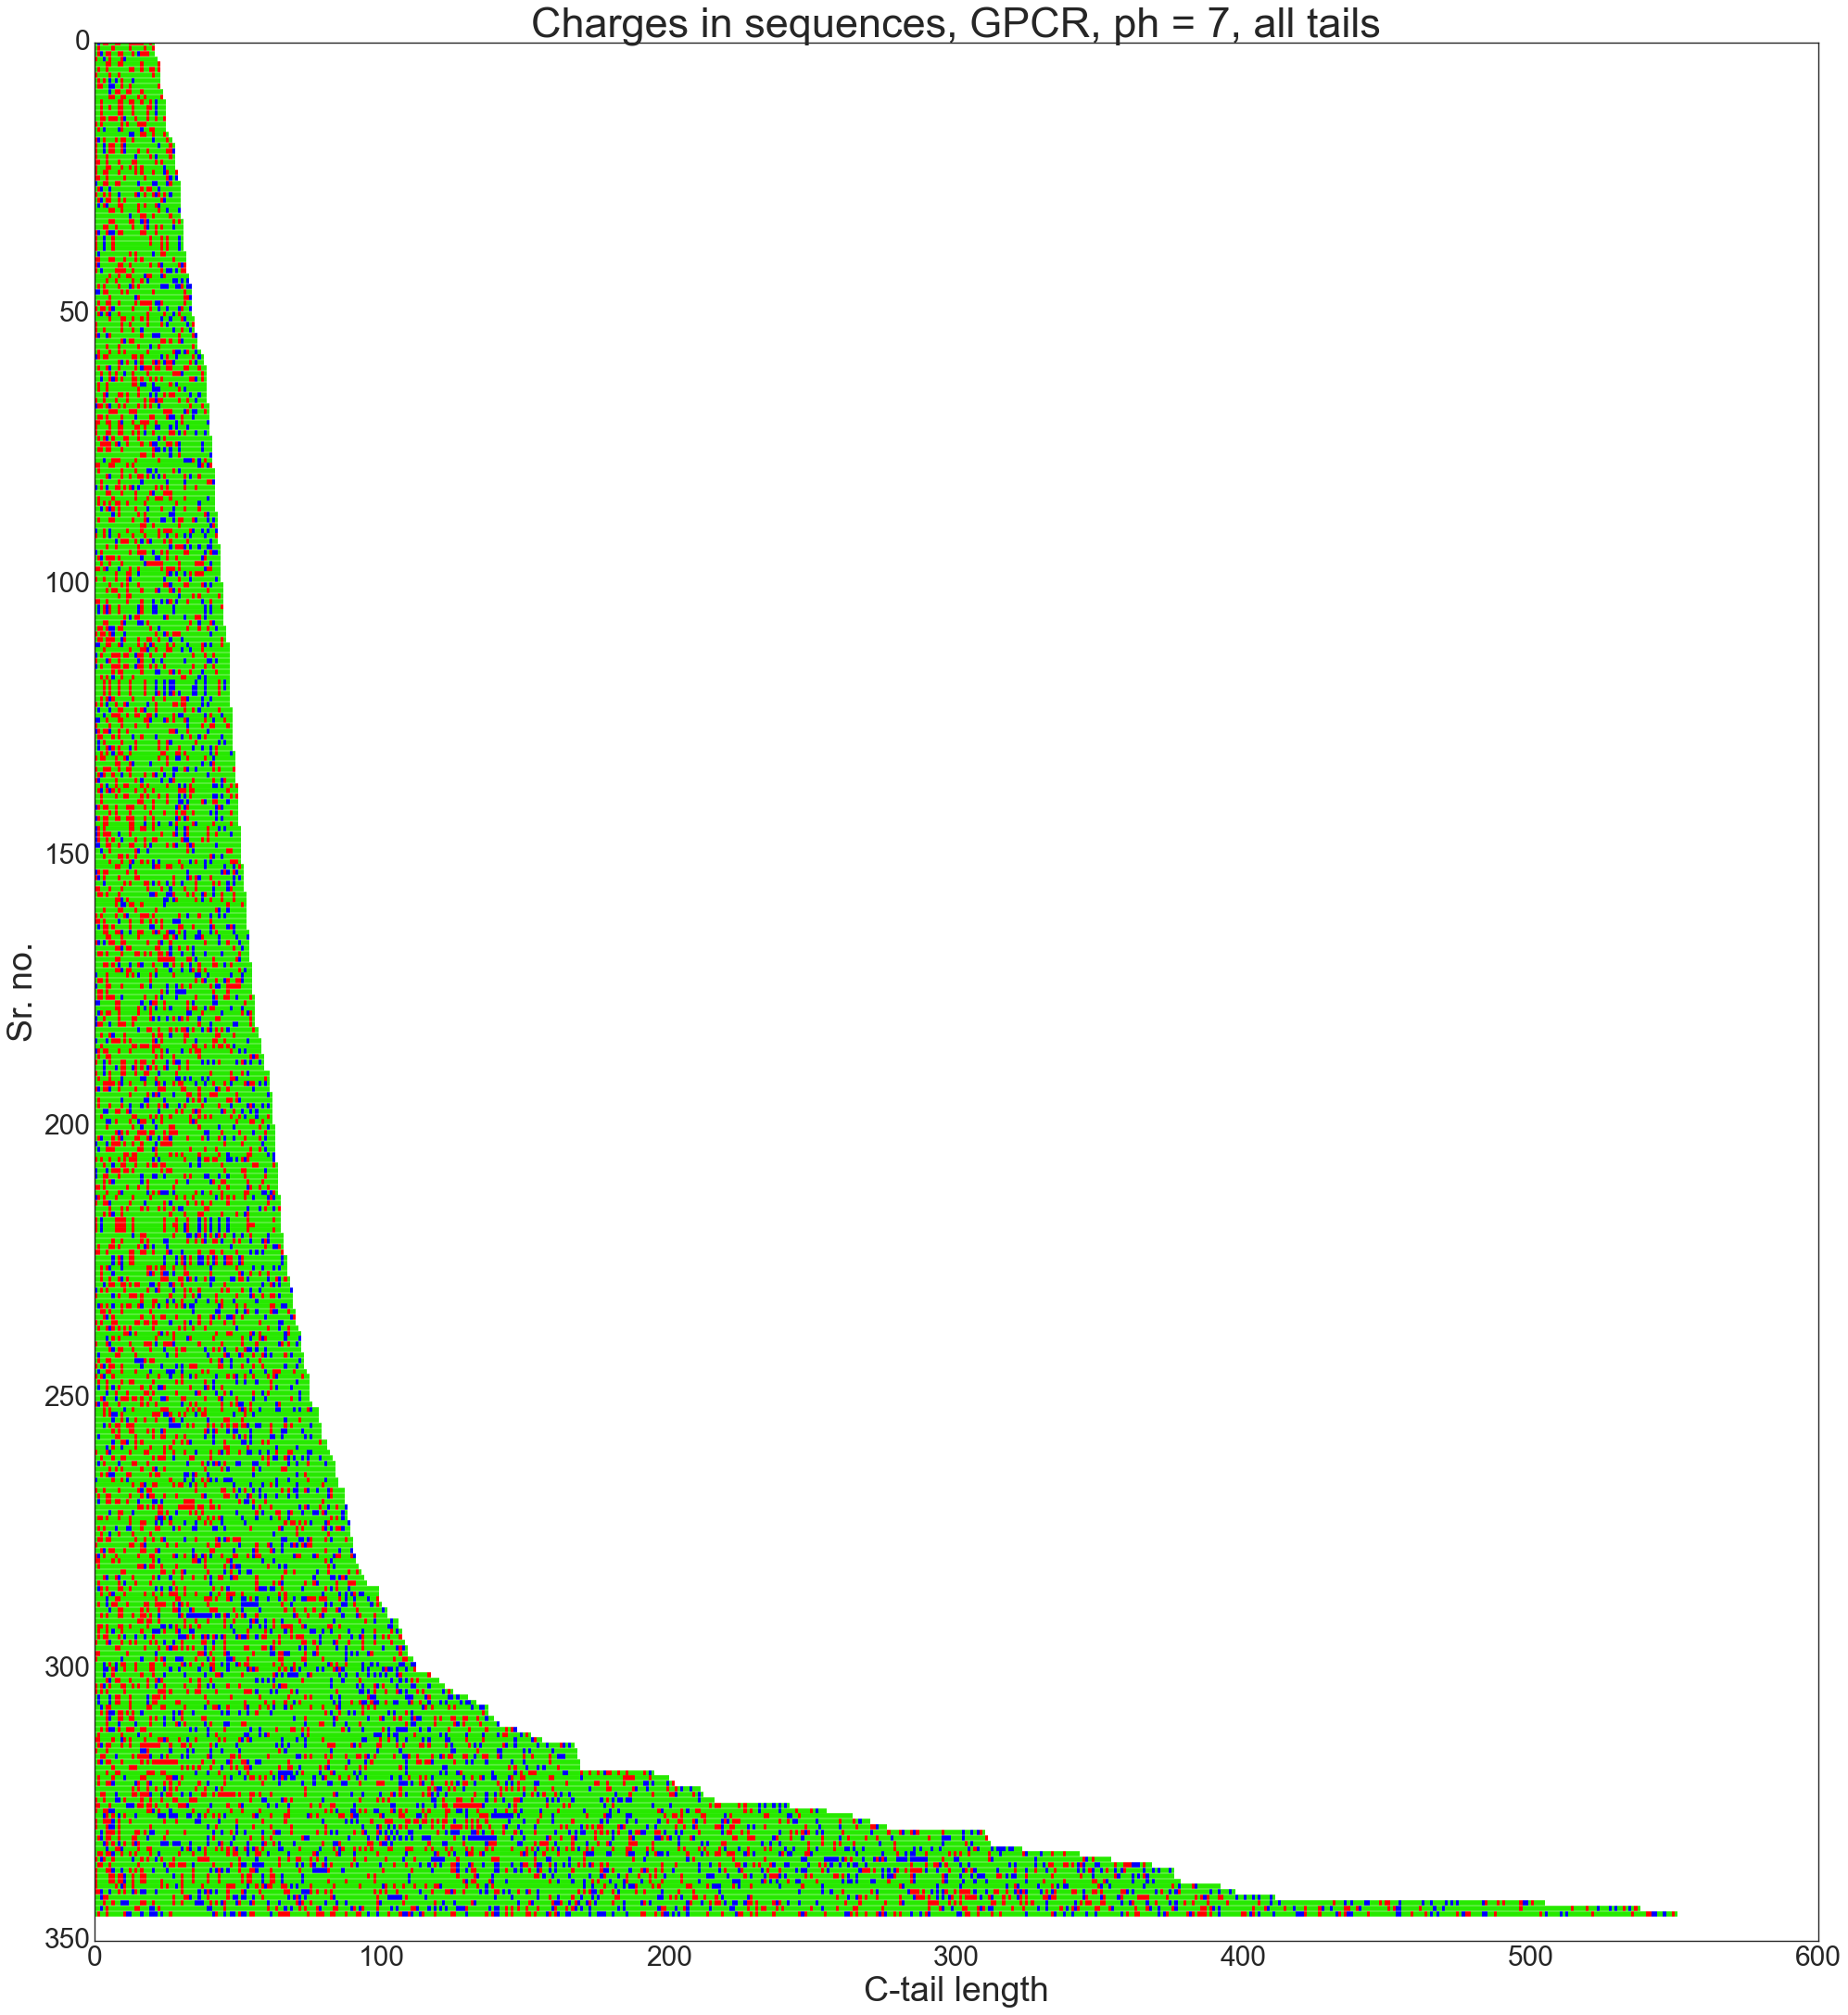

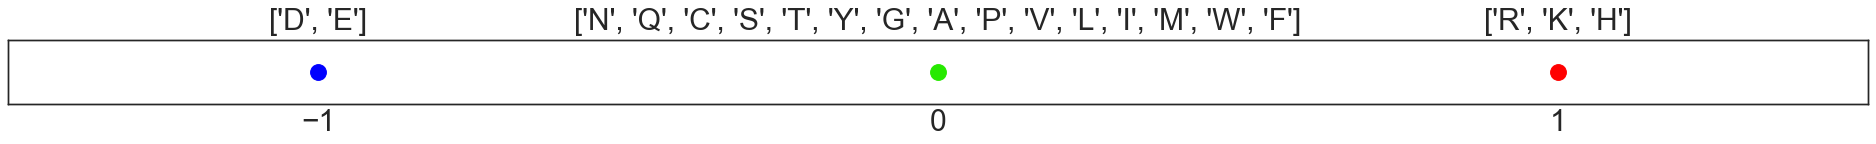

In [9]:
_ = gpcr.line_charges_in_sequences( 
                                    charges_aas = gpcr.AA.CHARGES_PH7,
                                    scale_factor = 0.45,
                                    figsize      = (30, 32),
                                    savefig      = False,
                                    title_add    = ", ph = 7, all tails"
                                    ) 

### Long tails

100% |########################################################################|


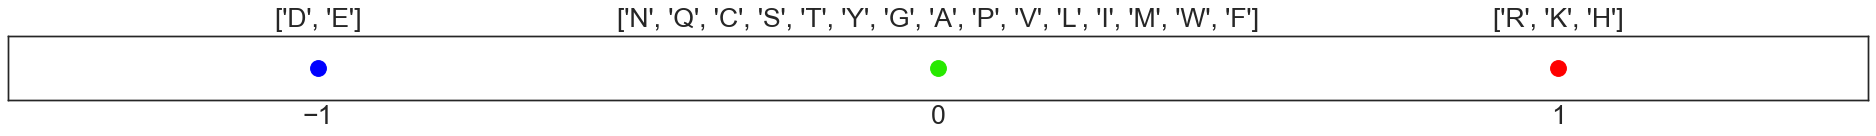

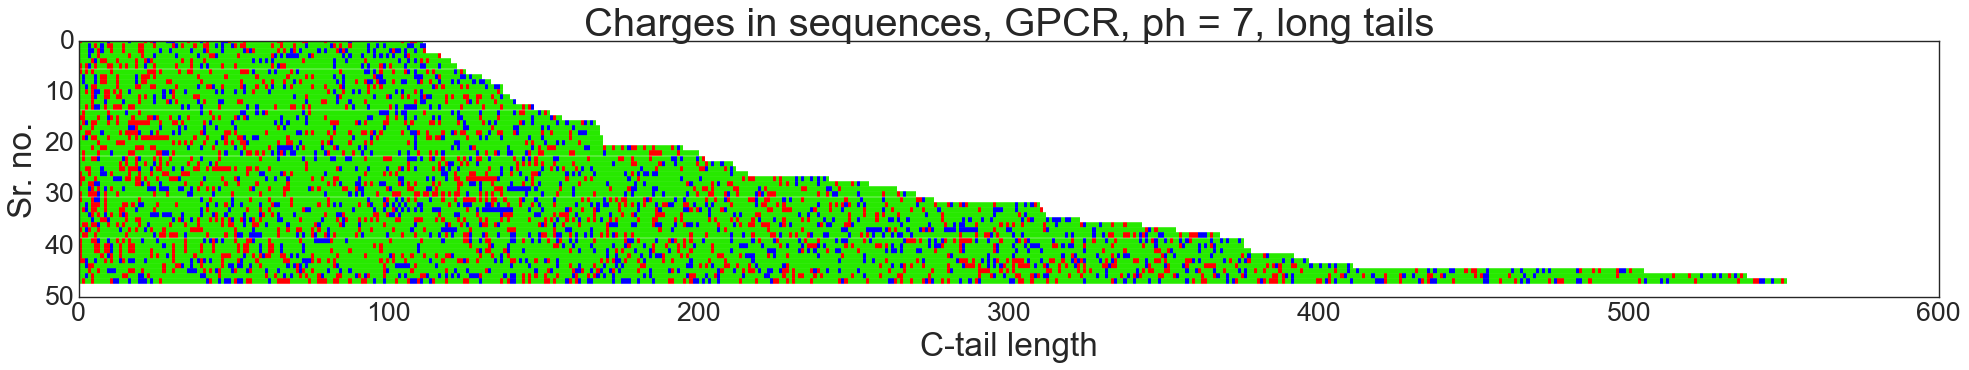

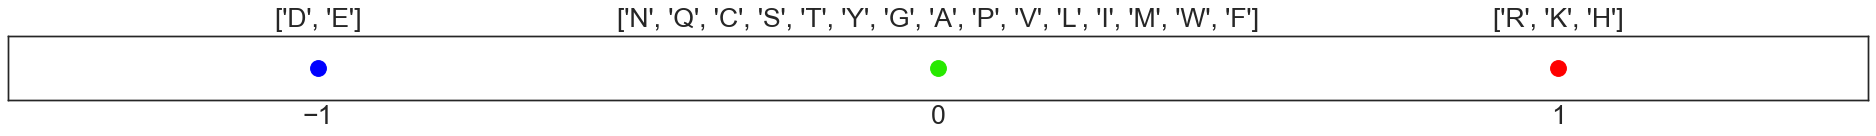

In [10]:
_ = gpcr.line_charges_in_sequences( 
                                    charges_aas = gpcr.AA.CHARGES_PH7,
                                    scale_factor = 3,
                                    figsize      = (30, 4),
                                    # normalized   = False,
                                    savefig      = False,
                                    threshold_len_min   = 110,
                                    # threshold_len_max   = None,
                                    title_add    = ", ph = 7, long tails"
                                    ) 

### Short tails

100% |########################################################################|


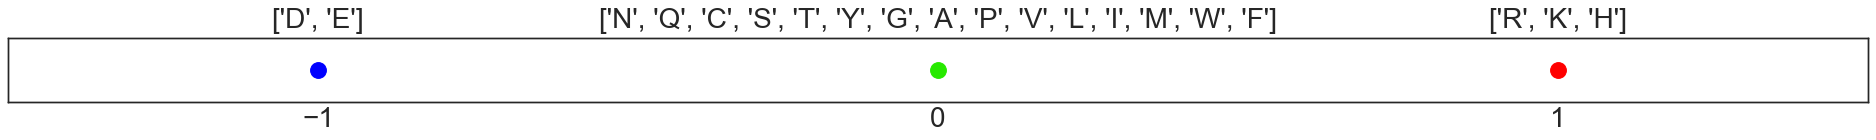

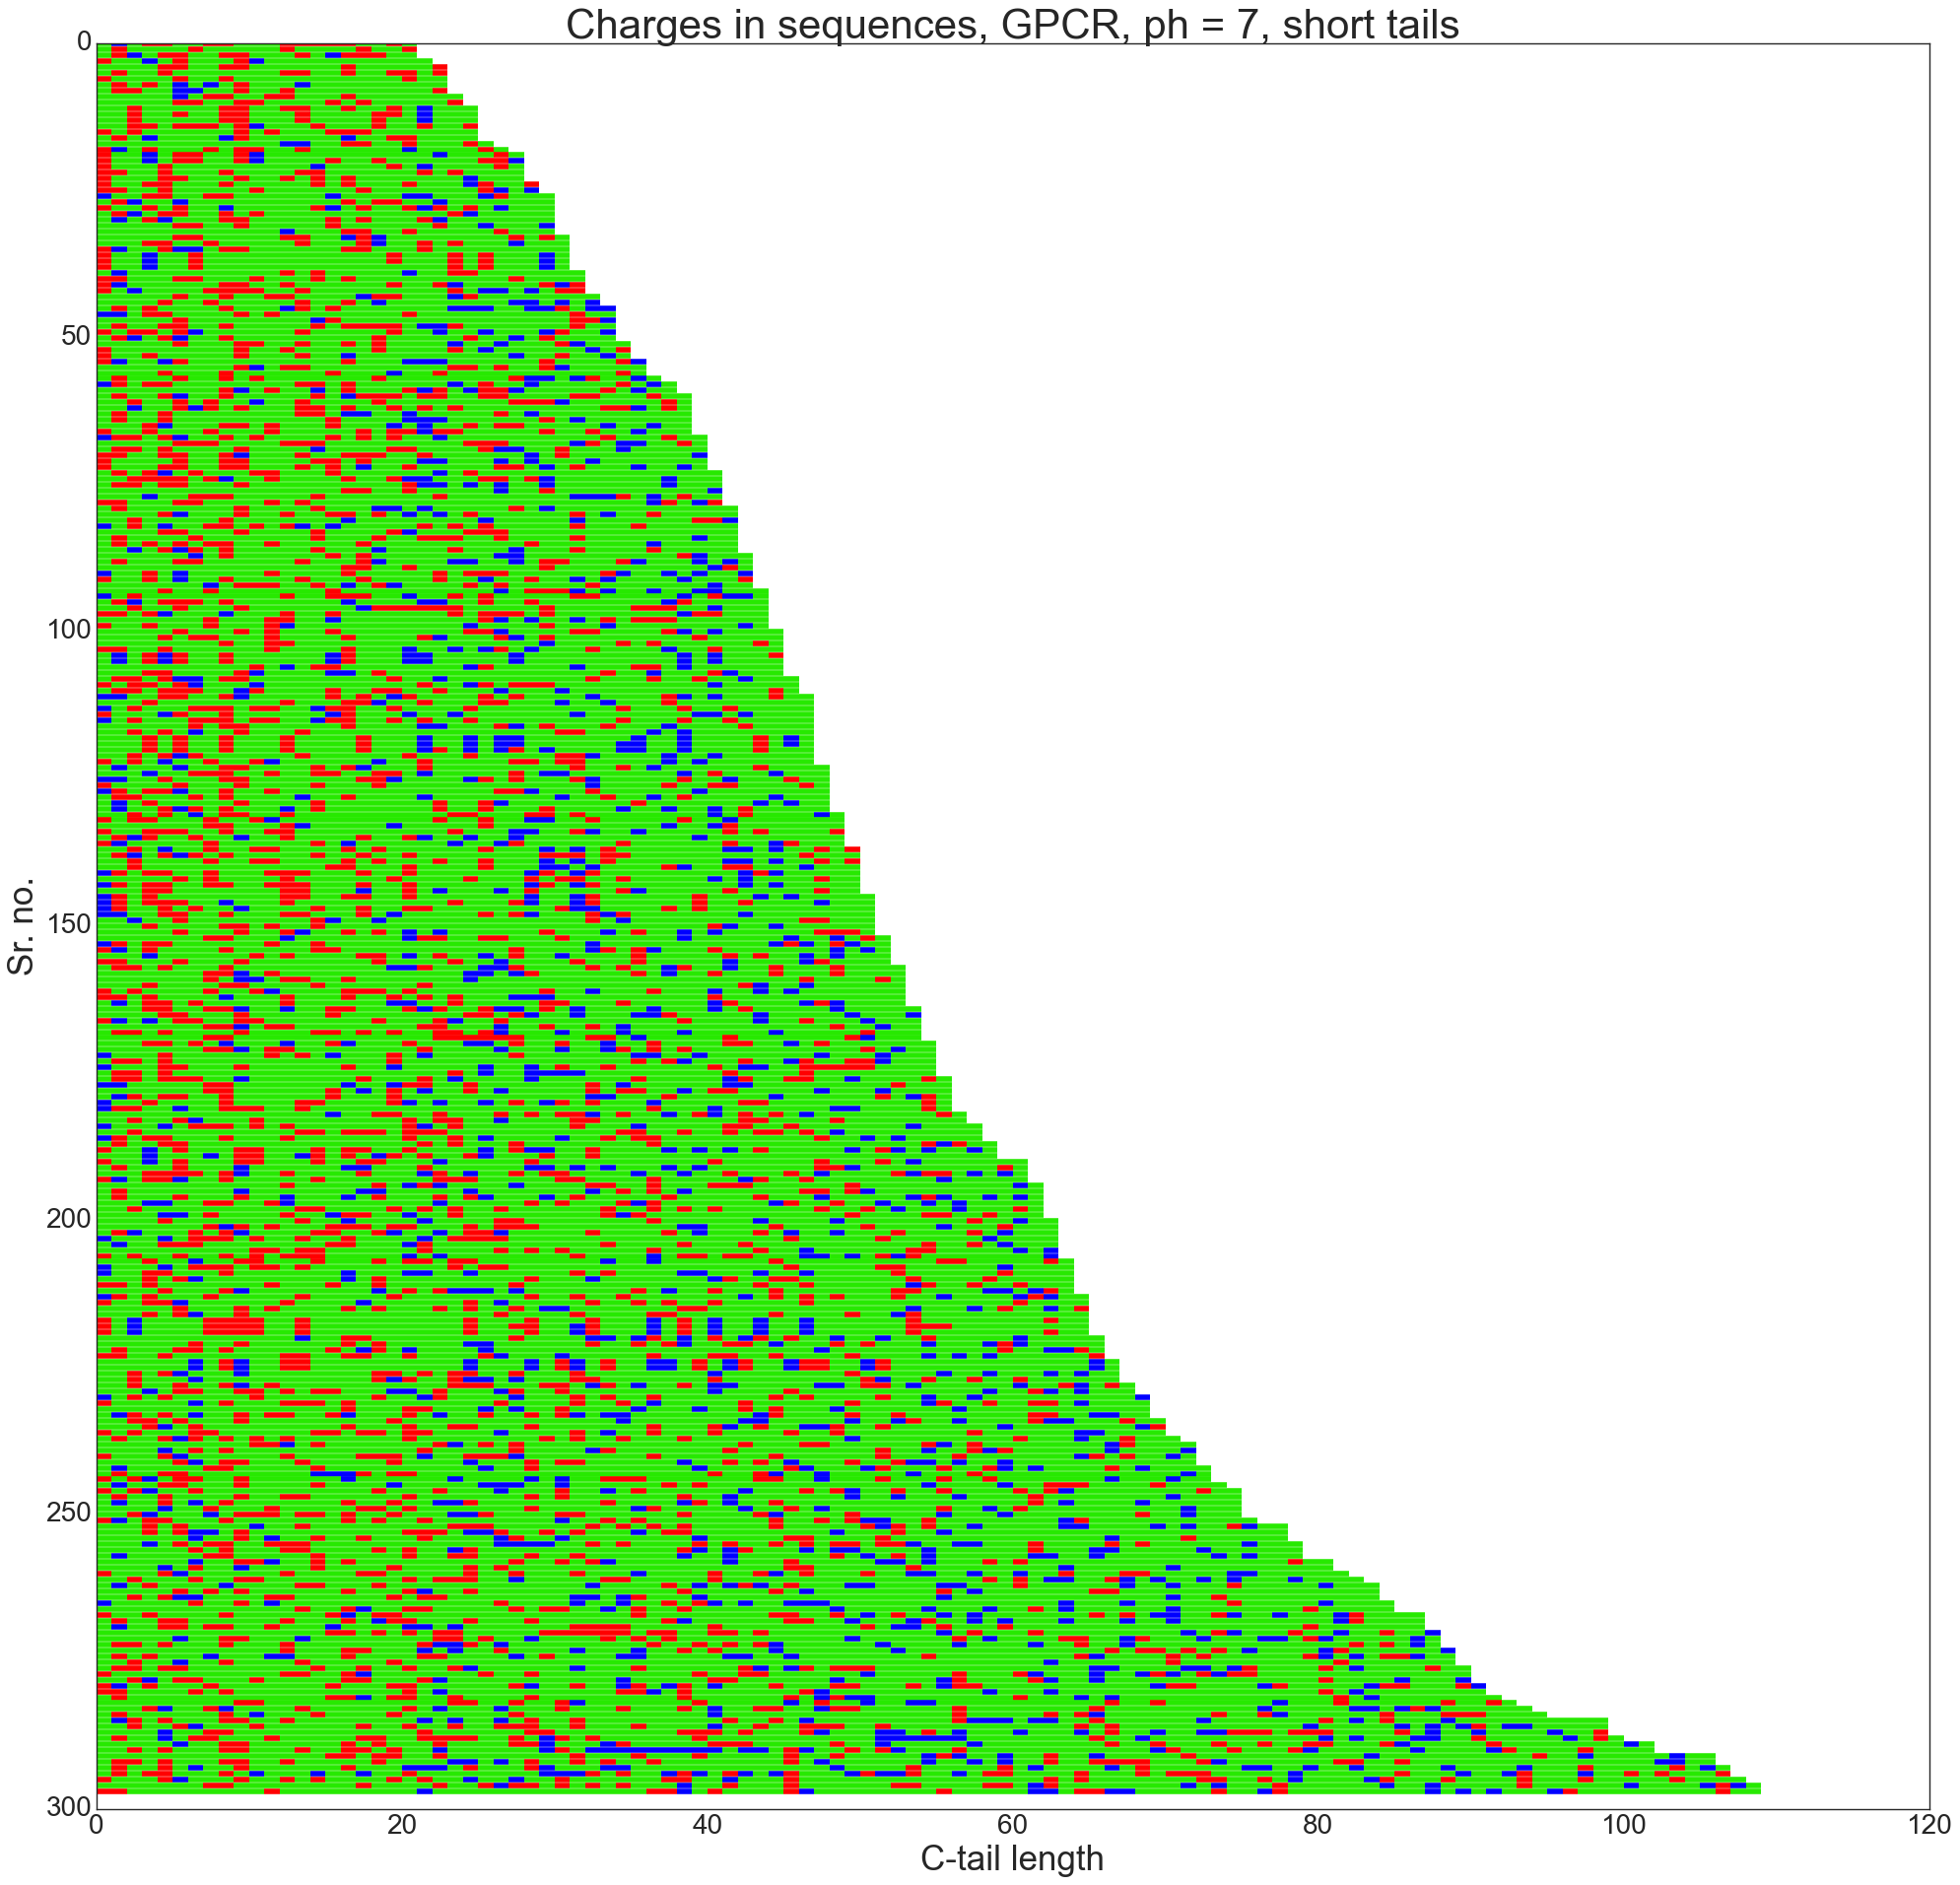

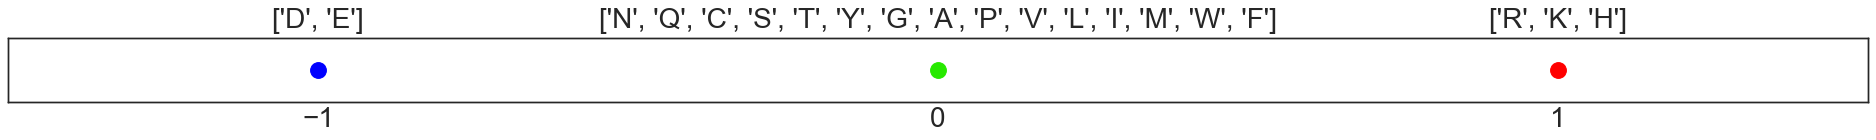

In [11]:
_ = gpcr.line_charges_in_sequences( 
                                    charges_aas = gpcr.AA.CHARGES_PH7,
                                    scale_factor = 0.45,
                                    figsize      = (30, 28),
                                    savefig      = False,
                                    # threshold_len_min   = None,
                                    threshold_len_max   = 110,
                                    title_add    = ", ph = 7, short tails"
                                    ) 